In [1]:
import numpy as np
import torch

In [2]:
import sys
sys.path.append('/Users/mehdi/github/pipeline')

In [3]:
from sysnet.sources import DNN

  pip install torch-lr-finder -v --global-option="amp"


In [4]:
from sysnet.sources import LoadData

my microphone is not working -- it's blinking

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
model = DNN(*(4, 20, 18, 1))
model.load_state_dict(torch.load('../checkpoints/model_test.pt'))

<All keys matched successfully>

In [7]:
model

DNN(
  (fc): ModuleList(
    (0): Linear(in_features=18, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
  (bn): ModuleList(
    (0): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [8]:
fc0_weight = model.fc[0].weight.data.numpy()

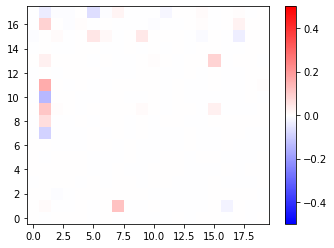

In [9]:
plt.imshow(fc0_weight.T, origin='lower', cmap=plt.cm.bwr, vmin=-0.5, vmax=0.5)#, vmin=-0.3, vmax=0.3)
plt.colorbar()
plt.show()

In [10]:
xlabels = ['EBV', 'lnHI', 'nstar']\
        + ['-'.join([s, b]) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd'] for b in 'rgz']

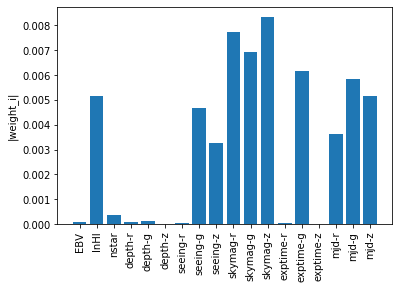

In [11]:
plt.bar(np.arange(18), abs(fc0_weight.mean(axis=0)))
plt.ylabel('|weight_i|')
_=plt.xticks(np.arange(18), labels=xlabels, rotation=90)

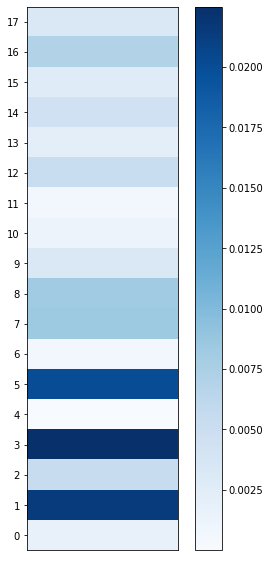

In [14]:
plt.figure(figsize=(6, 10))
plt.imshow(abs(fc0_weight.mean(axis=0)[:, np.newaxis]), 
           cmap=plt.cm.Blues, extent=(0, 5, -0.5, 17.5), origin='lower')
plt.yticks(np.arange(18))
plt.xticks([])
plt.colorbar()